<a href="https://colab.research.google.com/github/itoshiyanazawa/cnn_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
# download tensorflow 2.15
!pip install tensorflow==2.15

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import keras
from tensorflow.keras.models import Model

In [ ]:
# check tf version
tf.__version__

'2.15.0'

# Step 1

1. Load the CIFAR-10 dataset (You can use libraries like TensorFlow/Keras or PyTorch to load
the dataset.)
2. Explore the dataset (e.g., visualize some images, check the class distribution).
3. Use proper transformation on your data if required.
4. Normalize the image data.
5. Split the data into training, validation and test sets.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Set a seed value
SEED = 42

# Set the seed for NumPy
np.random.seed(SEED)

# Set the seed for TensorFlow
tf.random.set_seed(SEED)

# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Combine train and test data
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# 3. Function to split data equally
def split_data_equally(x, y, train_ratio=0.8):
    num_classes = 10
    indices = []
    for i in range(num_classes):
        idx = np.where(y == i)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * train_ratio)
        indices.append((idx[:split], idx[split:]))

    train_indices = np.concatenate([i[0] for i in indices])
    val_indices = np.concatenate([i[1] for i in indices])

    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)

    return x[train_indices], y[train_indices], x[val_indices], y[val_indices]

# 4. Split the data
x_train, y_train, x_val, y_val = split_data_equally(x_all, y_all)

# 5. Verify class distribution
def count_classes(y):
    return np.bincount(y.flatten())

print("Train set class distribution:", count_classes(y_train))
print("Validation set class distribution:", count_classes(y_val))
print("Test set class distribution:", count_classes(y_test))


Train set class distribution: [4800 4800 4800 4800 4800 4800 4800 4800 4800 4800]
Validation set class distribution: [1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
Test set class distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [ ]:
print('Image size of x_train: ', x_train.shape)
print('Image size of x_val: ', x_val.shape)
print('Image size of x_test: ', x_test.shape)

Image size of x_train:  (48000, 32, 32, 3)
Image size of x_val:  (12000, 32, 32, 3)
Image size of x_test:  (10000, 32, 32, 3)


In [ ]:
# Class label with its corresponding integer
# cifar10_labels = {
#     0: "airplane",
#     1: "automobile",
#     2: "bird",
#     3: "cat",
#     4: "deer",
#     5: "dog",
#     6: "frog",
#     7: "horse",
#     8: "ship",
#     9: "truck"
# }


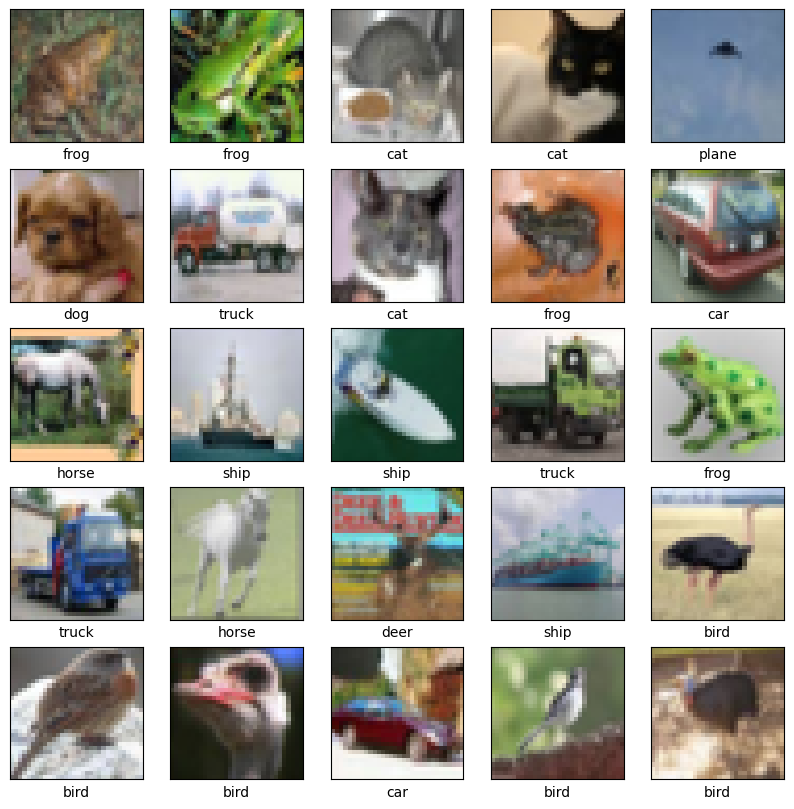

In [ ]:
# Visualize images
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.show()



*   Do normalization before image transformation to keep image information secure



In [ ]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0



*   Color is not important information in this case, object is important feature

*   Try color ones later to see improvement






In [ ]:
# Transform into grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
x_val = tf.image.rgb_to_grayscale(x_val)

# Step 2
1. Define the CNN architecture (e.g., using Keras or PyTorch).
2. Explain what type of layers you are including and why (layers like Conv2D, MaxPooling2D,
Flatten, Dense, …)
3. Visualize your CNN architecture
4. Compile the model with appropriate loss function and optimizer. Explain your choice of loos
function and optimizer.
5. Train the model on the training data and validate it on the validation set.
6. Visualize the training process using both training and validation results.

In [ ]:
# Define the CNN architecture
import keras
num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', name='last_conv'),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

**Why this architecture**

*   conv2D: To devide data into small pieces (kernel?), repeating it to learn increasingly complex and abstract representations
  *   By increaing the number of filters, it makes CNN learn images in detail (hierarical structure?)
*   ReLu: helps CNN learn non-linear relationship between features and images
*   max_pooling: To capture the most important features on each kernel
*   global_average_pooling: Enforces correspondence between feature maps and categories
*   dropout: To avoid overfitting to the training dataset
*   dense: To learn combination of features from the previous layers
*   softmax: To give probabilities for each class to choose the biggest value as output




In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

**Why these loss function and optimizer**


*   **SparseCategoricalCrossentropy**: This loss function is suitable for multi-class classification, like this 10 class clasification. It computes the cross-entropy loss between the true class labels and the predicted probabilities, ensuring that the model effectively learns to classify images into one of these distinct categories

*   **Adam**: This was chosen because of its adaptive learning rate capabilities, which make it effective for training CNN. Also, it requires less memory and high performance



In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='best_model.keras', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2),
]

train_progress = model.fit(
    x_train, y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
    callbacks = callbacks,
)

score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Epoch 1/20
375/375 [==============================] - 178s 464ms/step - loss: 1.8988 - accuracy: 0.3049 - val_loss: 1.6230 - val_accuracy: 0.4101
Epoch 2/20
375/375 [==============================] - 157s 419ms/step - loss: 1.5494 - accuracy: 0.4494 - val_loss: 1.4241 - val_accuracy: 0.4983
Epoch 3/20
375/375 [==============================] - 153s 409ms/step - loss: 1.3562 - accuracy: 0.5261 - val_loss: 1.1918 - val_accuracy: 0.5858
Epoch 4/20
375/375 [==============================] - 153s 409ms/step - loss: 1.2166 - accuracy: 0.5782 - val_loss: 1.0678 - val_accuracy: 0.6242
Epoch 5/20
375/375 [==============================] - 150s 401ms/step - loss: 1.1332 - accuracy: 0.6125 - val_loss: 1.0623 - val_accuracy: 0.6336
Epoch 6/20
375/375 [==============================] - 152s 405ms/step - loss: 1.0452 - accuracy: 0.6415 - val_loss: 0.9611 - val_accuracy: 0.6609
Epoch 7/20
375/375 [==============================] - 151s 403ms/step - loss: 0.9780 - accuracy: 0.6640 - val_loss: 0.9458 -

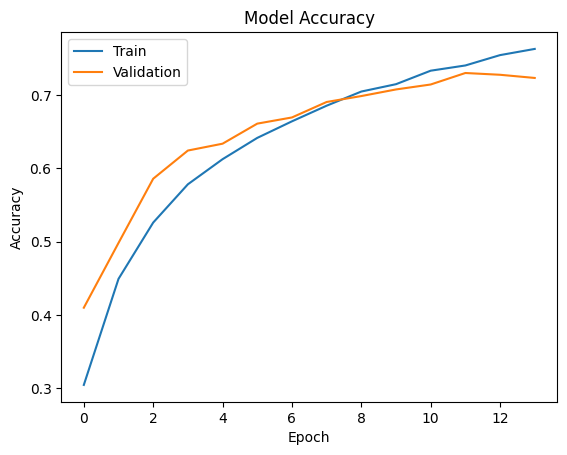

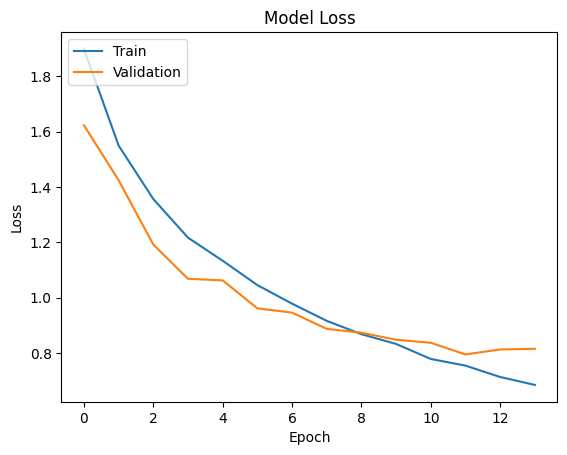

In [ ]:
# Visualize the training process using both training and validation results.
import matplotlib.pyplot as plt

history = train_progress.history

# Plot training and validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 3
1. Use the trained model to predict labels for the test set.
2. Compute performance metrics such as accuracy, precision, recall, and F1-score (Explain your
choice).
3. Visualize your confusion matrix.
4. Analyze the results and identify potential improvements.

In [ ]:
# Use the trained model to predict labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 7s 23ms/step


**Compute performance**

*   **Accuracy**: To evaluate the overall model performance, check the proportion of the number of correct decision making out of all predictions
*   **Precision**: To assess the model performance if it can identify instances of a particular class correctly
*   **Recall**: To measures the model's ability to identify all instances of a particular class
*   **F1-score**: To balance the trade-off between identifying true positives and minimizing false positives. In this case, we would like to perform well to get true positives, at the same time, minimize misclasification or false positives, so applied this metric






In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score:', f1)

Accuracy: 0.7887
Precision: 0.7981395667310405
Recall: 0.7887
F1 score: 0.7883019960825651


**Performance Analysis**


*   F1 score is below 0.8, so performance of this model is average.
*   Comapring accuracy and recall, there's no difference, that shows our model is balancly detected 10 classes.



Text(95.72222222222221, 0.5, 'True')

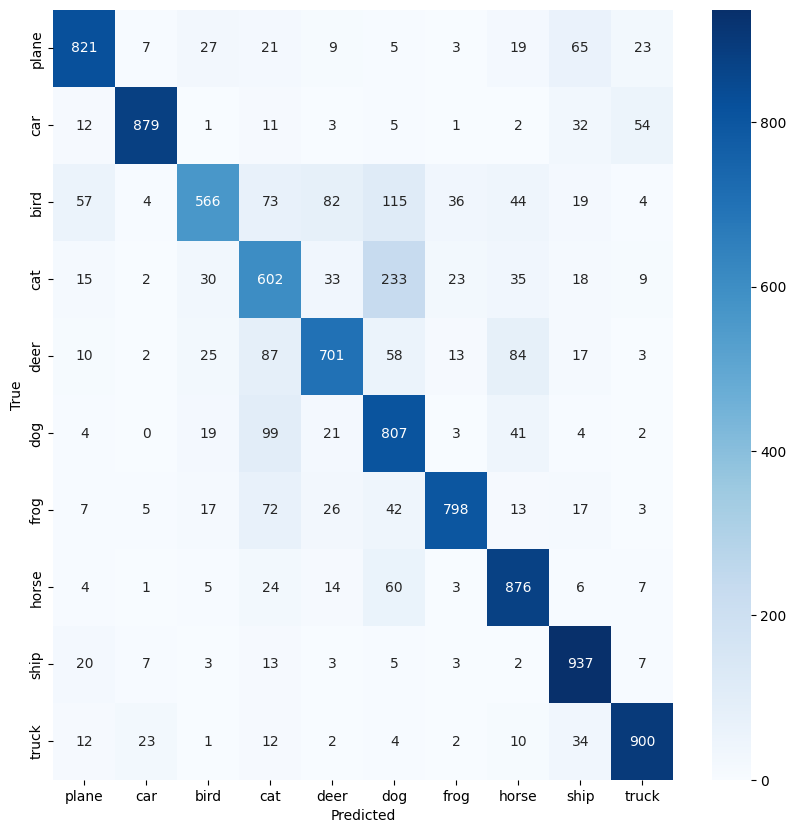

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')

**Confusion matrix analysis**


*   This chart shows that our model struggle to differenciate from cat to dog.
  *    Identify which information our model used to classify
    *    Create image heat map
*   Animals except frog were poor performance



**Grad-CAM to see how the our model works**
*   Analyze clasification performance for cat and dog




In [ ]:
# Get cat and dog images from testing dataset
cat_idx = np.where(y_test == 3)[0]
dog_idx = np.where(y_test == 5)[0]

# Ensure indices are within the valid range
cat_idx = cat_idx[cat_idx < x_test.shape[0]]  # Filter indices
dog_idx = dog_idx[dog_idx < x_test.shape[0]]  # Filter indices

cat_image = x_test[cat_idx[0]]  # Access the first cat image
dog_image = x_test[dog_idx[0]]  # Access the first dog image

cat_image = np.expand_dims(cat_image, axis=0)
dog_image = np.expand_dims(dog_image, axis=0)

# cat_image and dog_image are already numpy arrays,
# so you don't need to call .numpy() on them
cat_image_np = cat_image.squeeze()  # Remove extra dimensions
dog_image_np = dog_image.squeeze()

# Rescale pixel values to 0-255
cat_image_np = (cat_image_np * 255).astype(np.uint8)
dog_image_np = (dog_image_np * 255).astype(np.uint8)

# Save as PNG files
plt.imsave('cat_image.png', cat_image_np, cmap='gray')
plt.imsave('dog_image.png', dog_image_np, cmap='gray')

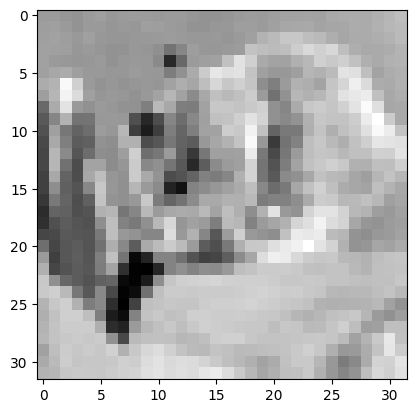

(1, 32, 32, 1)


In [ ]:
import matplotlib.pyplot as plt

image = cv2.imread('/content/cat_image.png', 0)
image = cv2.bitwise_not(image)
image = cv2.resize(image, (32, 32))

# checking how it looks
plt.imshow(image, cmap="gray")
plt.show()

image = tf.expand_dims(image, axis=-1)
image = tf.divide(image, 255)
image = tf.reshape(image, [1, 32, 32, 1])

print(image.shape)

In [ ]:
model = keras.models.load_model('/content/best_model.keras')

In [ ]:
preds = model.predict(image)
i = np.argmax(preds[0])
i

1/1 [==============================] - 0s 112ms/step


3



*   Lable 3 is cat



In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])



        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)

            loss = predictions[:, tf.argmax(predictions[0])]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
icam = GradCAM(model, i, 'last_conv')
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

image = cv2.imread('/content/temp_cat.jpg')
image = cv2.resize(image, (32, 32))
print(heatmap.shape, image.shape)

(heatmap, output) = icam.overlay_heatmap(heatmap, image, alpha=0.5)

(32, 32) (32, 32, 3)


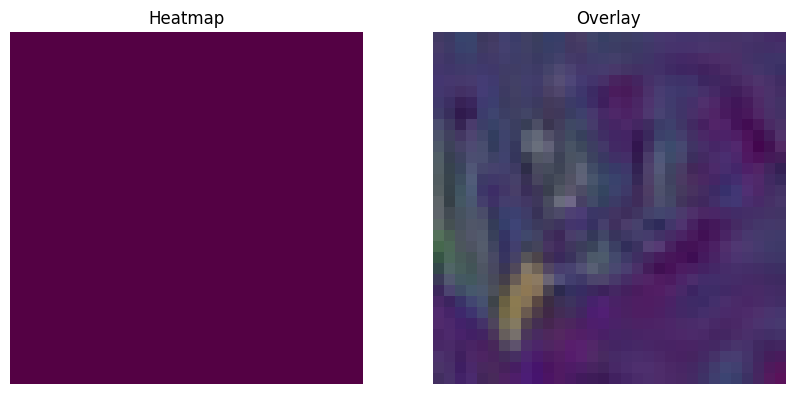

In [ ]:
# Corrected code for the last cell
image = cv2.imread('/content/temp_cat.jpg')
image = cv2.resize(image, (32, 32))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Preprocess the image
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
image = tf.divide(image, 255)  # Normalize

# Instantiate GradCAM
icam = GradCAM(model, i, layerName='last_conv')

# Compute heatmap
heatmap = icam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (32, 32))

# Overlay heatmap on the original image
original_image = cv2.imread('/content/temp_cat.jpg')
original_image = cv2.resize(original_image, (32, 32))

# Convert original_image to 3 channels (e.g., BGR) before overlaying
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) #changed to keep 3 channel image

(heatmap, output) = icam.overlay_heatmap(heatmap, original_image, alpha=0.5)

# Display the result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Heatmap')
plt.imshow(heatmap)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Overlay')
plt.imshow(output)
plt.axis('off')
plt.show()



*   Nothing can't detect in this image, but got a correct label



In [ ]:
def plot_grad_cad(img_path):
  image = cv2.imread(img_path, 0)
  image = cv2.resize(image, (32, 32))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Preprocess the image
  image = tf.expand_dims(image, axis=0)  # Add batch dimension
  image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
  image = tf.divide(image, 255)  # Normalize

  preds = model.predict(image)
  i = np.argmax(preds[0])
  print('Result label: ', i)

  # Instantiate GradCAM
  icam = GradCAM(model, classIdx=i, layerName='last_conv')

  # Compute heatmap
  heatmap = icam.compute_heatmap(image)
  heatmap = cv2.resize(heatmap, (32, 32))

  # Overlay heatmap on the original image
  original_image = cv2.imread(img_path, 0)
  original_image = cv2.resize(original_image, (32, 32))

  # Convert original_image to 3 channels (e.g., BGR) before overlaying
  original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB) #changed to keep 3 channel image

  (heatmap, output) = icam.overlay_heatmap(heatmap, original_image, alpha=0.5)

  # Display the result
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.title('Heatmap')
  plt.imshow(heatmap)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title('Overlay')
  plt.imshow(output)
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 22ms/step
Result label:  4


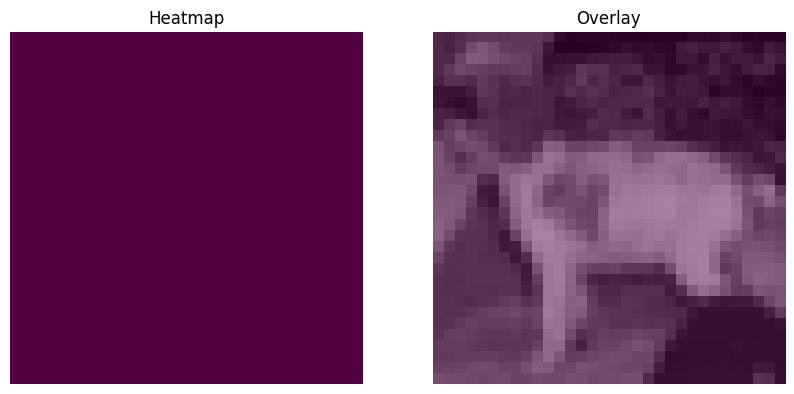

In [ ]:
plot_grad_cad("/content/dog_image.png")

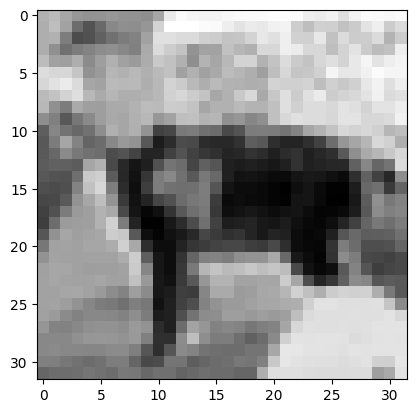

In [ ]:
image = cv2.imread('/content/dog_image.png', 0)
image = cv2.bitwise_not(image)
image = cv2.resize(image, (32, 32))

# checking how it looks
plt.imshow(image, cmap="gray")
plt.show()

image = tf.expand_dims(image, axis=-1)
image = tf.divide(image, 255)
image = tf.reshape(image, [1, 32, 32, 1])

# Step 4

In [2]:
# Install TensorFlow 2.15 if not installed
!pip install tensorflow==2.15

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [3]:
# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Load CIFAR-10 dataset (RGB images)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images (scale pixel values to [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split training set into train (80%) and validation (20%) sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)

# Verify dataset shape
print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_val.shape}")
print(f"Test set shape: {x_test.shape}")

# Define class labels
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 13s 0us/step
Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [4]:
# Advanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]  # Adjust brightness
)

datagen.fit(x_train)

In [5]:
# Define deeper CNN model
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dropout(0.6),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile CNN model
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [6]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.flatten())
class_weight_dict = {i: class_weights[i] for i in range(10)}

In [7]:
# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='best_model_cnn.keras', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

# Train CNN model with class weights
train_progress_cnn = model_cnn.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=30,
    validation_data=(x_val, y_val),
    class_weight=class_weight_dict,  # Apply class weighting
    callbacks=callbacks
)

Epoch 1/30
313/313 [==============================] - 345s 1s/step - loss: 2.3344 - accuracy: 0.0097 - val_loss: 2.2996 - val_accuracy: 0.0000e+00
Epoch 2/30
313/313 [==============================] - 339s 1s/step - loss: 2.2998 - accuracy: 0.0013 - val_loss: 2.3029 - val_accuracy: 0.0000e+00
Epoch 3/30
313/313 [==============================] - 339s 1s/step - loss: 2.3029 - accuracy: 0.2454 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 4/30
313/313 [==============================] - 339s 1s/step - loss: 2.3016 - accuracy: 0.4664 - val_loss: 2.3036 - val_accuracy: 0.0000e+00


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 (without top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification head
x = base_model.output  # Get the output from ResNet50
x = GlobalAveragePooling2D()(x)  # Convert feature maps to a vector
x = Dense(512, activation='relu')(x)  # Fully connected layer
x = Dense(10, activation='softmax')(x)  # Output layer for 10 classes

# Create final model
model_resnet = Model(inputs=base_model.input, outputs=x)

# Unfreeze last 10 layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile ResNet50 model
model_resnet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower LR for fine-tuning
    metrics=['accuracy']
)

# Train ResNet50 model
train_progress_resnet = model_resnet.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
